In [4]:
"""
steps:
    0. import
    1. read data
    2. copy
    3. head, info, dtypes, describe, shape
    4. convert dtype
    5. isnull
    6. dropna, drop(df["col"], axis=1)
    7. set x and y
    8. labelEncode and standardize with help of pipeline
    9. train_test_split(x, y, test_size, random_state)
    10. create nn model and summary and compile
    11. train the model
    12. evaluate
"""

'\nsteps:\n    0. import\n    1. read data\n    2. copy\n    3. head, info, dtypes, describe, shape\n    4. convert dtype\n    5. isnull\n    6. dropna, drop(df["col"], axis=1)\n    7. set x and y\n    8. labelEncode and standardize with help of pipeline\n    9. train_test_split(x, y, test_size, random_state)\n    10. create nn model and summary and compile\n    11. train the model\n    12. evaluate\n'

Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Perform following steps:
1.	Read the dataset.
2.	Distinguish the feature and target set and divide the data set into training and test sets.
3.	Normalize the train and test data.
4.	Initialize and build the model. Identify the points of improvement and implement the same.
5.	Print the accuracy score and confusion matrix.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('./datasets/a3-bank.csv')
df = data.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.shape

(10000, 14)

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
x = df.iloc[:, 3:13]
y = df.iloc[:, -1]

In [11]:
x.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [12]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# x["Geography"] = le.fit_transform(x["Geography"])
# x["Gender"] = le.fit_transform(x["Gender"])
# x.dtypes

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [
        ("Categorizer", ColumnTransformer(
        [
            ("Gender Label Encoder", OneHotEncoder(categories = 'auto', drop = 'first'), [2]),
            ("Geography Label Encoder", OneHotEncoder(categories = 'auto', drop = 'first'), [1])
        ],
        remainder = 'passthrough', n_jobs=1)),
        ("Normalizer", StandardScaler())
    ]
)

In [14]:
x = pipeline.fit_transform(x)
x

array([[-1.09598752, -0.57873591, -0.57380915, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.09598752, -0.57873591,  1.74273971, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.09598752, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-1.09598752, -0.57873591, -0.57380915, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 0.91241915,  1.72790383, -0.57380915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-1.09598752, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [17]:
nn = Sequential()

In [18]:
nn.add(Dense(6, activation="relu", input_shape = (x_train.shape[1], )))
nn.add(Dropout(rate=0.1))

In [19]:
nn.add(Dense(6, activation="relu"))
nn.add(Dropout(rate=0.1))

In [20]:
nn.add(Dense(1, activation="sigmoid"))

In [21]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
nn.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
history = nn.fit(x_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)

Epoch 1/200
225/225 - 4s - loss: 0.5204 - accuracy: 0.7887 - val_loss: 0.4840 - val_accuracy: 0.7950 - 4s/epoch - 18ms/step
Epoch 2/200
225/225 - 1s - loss: 0.4822 - accuracy: 0.7954 - val_loss: 0.4568 - val_accuracy: 0.7950 - 1s/epoch - 7ms/step
Epoch 3/200
225/225 - 1s - loss: 0.4640 - accuracy: 0.7996 - val_loss: 0.4415 - val_accuracy: 0.7987 - 1s/epoch - 6ms/step
Epoch 4/200
225/225 - 1s - loss: 0.4539 - accuracy: 0.8037 - val_loss: 0.4321 - val_accuracy: 0.8062 - 1s/epoch - 5ms/step
Epoch 5/200
225/225 - 1s - loss: 0.4470 - accuracy: 0.8081 - val_loss: 0.4260 - val_accuracy: 0.8163 - 892ms/epoch - 4ms/step
Epoch 6/200
225/225 - 1s - loss: 0.4445 - accuracy: 0.8069 - val_loss: 0.4209 - val_accuracy: 0.8188 - 924ms/epoch - 4ms/step
Epoch 7/200
225/225 - 1s - loss: 0.4403 - accuracy: 0.8043 - val_loss: 0.4176 - val_accuracy: 0.8213 - 1s/epoch - 5ms/step
Epoch 8/200
225/225 - 1s - loss: 0.4391 - accuracy: 0.8076 - val_loss: 0.4143 - val_accuracy: 0.8225 - 1s/epoch - 5ms/step
Epoch 9/2

In [23]:
nn_pred = nn.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [24]:
nn_pred = (nn_pred > 0.5).astype(int) # nn_pred = (condition).astype(int) // astype changes T/F to 1/0
nn_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

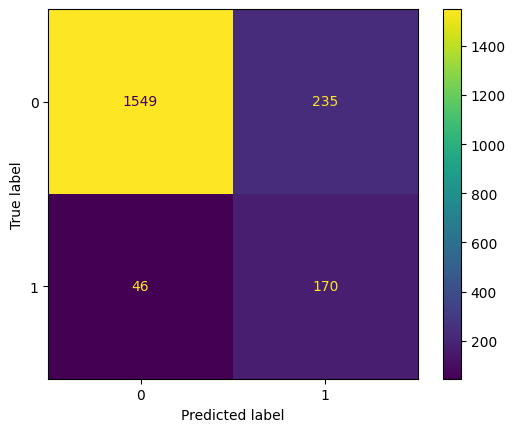

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
nn_cm = confusion_matrix(nn_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=nn_cm)
disp.plot()
plt.show()

In [26]:
nn_accuracy = (nn_cm[0][0]+nn_cm[1][1])/len(y_test)